# Method #1

# Hofstadter Model

In [ ]:
import numpy as np

In [2]:
# Hofstadter Matrix
q=3
def Hq(kx, ky, q):
    Hk = np.zeros((q,q), dtype=complex)
    t = 1;p = 1;phi = p/q
    for i in range(0, q):
        Hk[i,i] = -2*t*np.cos(ky-2*i*np.pi*phi)
        if i==q-1:
            Hk[i,i-1] = 1
        elif i==0:
            Hk[i,i+1] = 1
        else:
            Hk[i,i-1] = 1
            Hk[i,i+1] = 1
        Hk[0,q-1]= -t*np.exp(-q*1.j*kx)
        Hk[q-1,0]= -t*np.exp(q*1.j*kx)
    return Hk

In [3]:
# Discreatizing Brillioun Zone
Nkx = q*q
Nky = q*Nkx
kkx=np.linspace(0,2.*np.pi/q,Nkx,endpoint=False)
kky=np.linspace(0,2.*np.pi,Nky,endpoint=False)

In [4]:
# Eigenvalues and Eigenenergies of Matrix
EEA=np.empty([Nkx,Nky,q])
UUA=np.empty([Nkx,Nky,q,q],dtype=complex)
for ikx, kx in enumerate(kkx):
    for iky, ky in enumerate(kky):
        EEA[ikx,iky,:],UUA[ikx,iky,:,:] = np.linalg.eigh(Hq(kx,ky,q))

Text(0.5, 1.0, 'q=3')

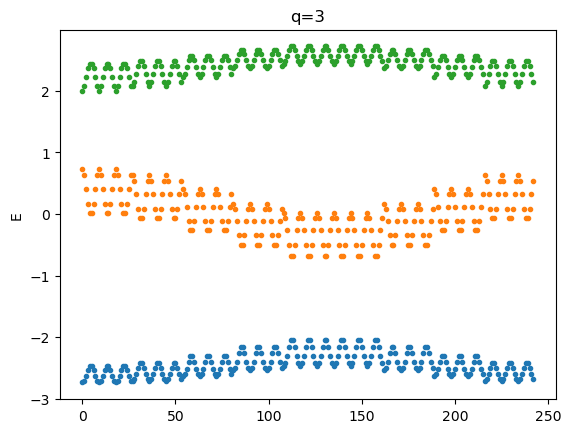

In [6]:
# Plot Energy Bands
import matplotlib.pyplot as plt
for i in range(q):
        plt.plot(EEA[:,:,i].flatten(),'.') 
plt.ylabel("E")
plt.title("q="+str(q))

\begin{equation}
    <U_i|U_j> = \delta_{ij}
\end{equation}

In [7]:
# Diklik Bağıntısı
np.dot(np.conj(UUA[1,0,:,1]),UUA[1,0,:,1])

(0.9999999999999997+0j)

In [8]:
# Caculate The Link Variables 
bi=bj=0 # Band Index
U1=np.zeros([Nkx,Nky],dtype=complex)
U2=np.zeros([Nkx,Nky],dtype=complex)
for ikx,kx in enumerate(kkx):
    for iky,ky in enumerate(kky):
        s1=np.dot(np.conj(UUA[ikx,iky,:,bi]),UUA[np.mod(ikx+1,Nkx),iky,:,bj]) # ?
        s2=np.dot(np.conj(UUA[ikx,iky,:,bj]),UUA[ikx,np.mod(iky+1,Nky),:,bi]) # ?
        U1[ikx,iky]=s1/np.abs(s1)
        U2[ikx,iky]=s2/np.abs(s2)
        if np.abs(s1)==0:
            print("s1=0",ikx,iky,np.abs(s1))
        if np.abs(s2)==0:
            print("s2=0:",ikx,iky,np.abs(s2)) 

In [9]:
# Calculate The Field Strength
F12=np.zeros([Nkx,Nky],dtype=complex) 
for ikx,kx in enumerate(kkx):
    for iky,ky in enumerate(kky):
        F12[ikx,iky] = U1[ikx,iky]*U2[np.mod(ikx+1,Nkx),iky]/(U1[ikx,np.mod(iky+1,Nky)]*U2[ikx,iky])
        F12[ikx,iky] = np.log(F12[ikx,iky])

In [11]:
# Chern Number of Band Index
print("Band Index:",bi)
F12.sum()/(2j*np.pi)

Band Index: 0


(1.0000000000000002-3.254131947619351e-16j)

# BE CAREFUL!
### ! Two models use common variables! 

# Kagome Model

In [1]:
import numpy as np

In [14]:
# Bravais Vectors
a1=np.array([2,0])
a2=np.array([1,np.sqrt(3)])
# Basis Vectors
a1_b=a1/2
a2_b=a2/2
# Reciprocal Vectors
b1x = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * a2[1]
b1y = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * -a2[0]
b2x = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * -a1[1]
b2y = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * a1[0]
b1=np.array([b1x,b1y]) 
b2=np.array([b2x,b2y]) 

print(f'b1={b1}, |b1|={np.linalg.norm(b1)}')
print(f'b1={b2}, |b2|={np.linalg.norm(b2)}')

print( (a1[0]*a2[1]-a1[1]*a2[0]) * (b1[0]*b2[1]-b1[1]*b2[0]) / np.pi/np.pi ) 

b1=[ 3.14159265 -1.81379936], |b1|=3.6275987284684357
b1=[0.         3.62759873], |b2|=3.6275987284684357
3.9999999999999996


In [88]:
# Hopping Parameters
# t1=-1;L1=0;t2=0;L2=0 # NN
# t1=-1;L1=1;t2=0;L2=0 # Complex NN (Well-Defined Berry Curvature)
# t1=0;L1=0;t2=-1;L2=-1 # Complex NNN
t1=-1;L1=0.28;t2=0.3;L2=0.2 # Complex NNN (Well-Defined Berry Curvature)
# Kagome Matrix
def Hamiltonian(kx,ky):
    k1=np.dot([kx,ky],a1_b);k2=np.dot([kx,ky],a2_b);k3=k2-k1 # Convention
    H = 2*t1*np.array([
    [0, np.cos(k1), np.cos(k2)],
    [np.cos(k1), 0, np.cos(k3)],        
    [np.cos(k2), np.cos(k3), 0]
    ])+2*1j*L1*np.array([
    [0, np.cos(k1), -np.cos(k2)],
    [-np.cos(k1), 0, np.cos(k3)],        
    [np.cos(k2), -np.cos(k3), 0]
    ])+2*t2*np.array([
    [0, np.cos(k2+k3), np.cos(k3-k1)],
    [np.cos(k2+k3), 0, np.cos(k1+k2)],
    [np.cos(k3-k1), np.cos(k1+k2), 0]
    ])+2*1j*L2*np.array([
    [0, -np.cos(k2+k3), np.cos(k3-k1)],
    [np.cos(k2+k3), 0, -np.cos(k1+k2)],
    [-np.cos(k3-k1), np.cos(k1+k2), 0]
    ])
    return H

In [89]:
# Discretizing Brillioun Zone
N1 = N2 = 48
# q1_list = np.arange(-N1//2,N1//2) / N1
q11_list = np.linspace(-N1,N1,N1,endpoint=False) / N1
# q2_list =  np.arange(-N2//2,N2//2) / N2
q22_list = np.linspace(-N2,N2,N2,endpoint=False) / N2
# Allowed k Pairs
Q = np.zeros([N1,N2,2])
for iq1, q1 in enumerate(q11_list):
    for iq2, q2 in enumerate(q22_list):
        Q[iq1,iq2,:] = q1*b1+q2*b2

In [90]:
# Eigenvalues and Eigenenergies of Matrix
q = (Hamiltonian(1,1).shape)[0] # Dimension of Matrix
EEA=np.empty([N1,N2,q])
UUA=np.empty([N1,N2,q,q],dtype=complex)
for iq1, q1 in enumerate(q11_list):
    for iq2, q2 in enumerate(q22_list):
        kx,ky=Q[iq1,iq2,:]
        EEA[iq1,iq2,:],UUA[iq1,iq2,:,:] = np.linalg.eigh(Hamiltonian(kx,ky))
kx,ky=Q[0,1,:] # Bu çifte karşılık gelen k bileşenleri
print(kx,ky)

Text(0, 0.5, 'E')

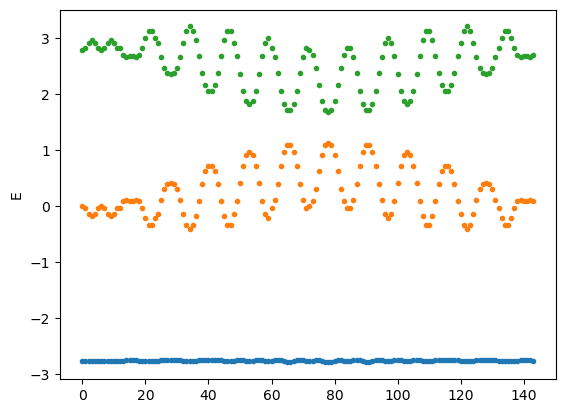

In [91]:
# Plot Energy Bands
import matplotlib.pyplot as plt
for i in range(3):
        plt.plot(EEA[:,:,i].flatten(),'.') 

In [92]:
# Diklik Bağıntısı
np.dot(np.conj(UUA[1,0,:,1]),UUA[1,0,:,1])

(0.9999999999999998+0j)

In [102]:
for bi in range(q): 
    # Caculate The Link Variables
    bj = bi # Band index  
    U1=np.zeros([N1,N2],dtype=complex)
    U2=np.zeros([N1,N2],dtype=complex)
    for iq1, q1 in enumerate(q11_list): # Orginal q1_list
        for iq2, q2 in enumerate(q22_list): # Orginal q2_list
            s1=np.dot(np.conj(UUA[iq1,iq2,:,bi]),UUA[np.mod(iq1+1,N1),iq2,:,bj]) 
            s2=np.dot(np.conj(UUA[iq1,iq2,:,bj]),UUA[iq1,np.mod(iq2+1,N2),:,bi]) 
            U1[iq1,iq2]=s1/np.abs(s1)
            U2[iq1,iq2]=s2/np.abs(s2)
    # Calculate The Field Strength
    F12=np.zeros([N1,N2],dtype=complex) 
    for iq1, q1 in enumerate(q11_list):
        for iq2, q2 in enumerate(q22_list):
            F12[iq1,iq2] = U1[iq1,iq2]*U2[np.mod(iq1+1,N1),iq2]/(U1[iq1,np.mod(iq2+1,N2)]*U2[iq1,iq2])
            F12[iq1,iq2] = np.log(F12[iq1,iq2])
    # Alternative F12 Calculation 
    # F12=np.log( U1*np.roll(U2,-1,axis=0)*np.conj(np.roll(U1,-1,axis=1)*U2) )
    # Chern Number of Band Index
    print("Band Index:",bi)
    print(F12.sum()/(2j*np.pi))

# Method #2

###### Hofstadter Model

Bu yöntem ile hesapta, çift sayılarda Chern sayıları yanlı geliyor.

In [1]:
import numpy as np

In [17]:
size = 6
def H_k(k_vec, size): #k_vec = [kx,ky]
    Hk = np.zeros((size,size), dtype=complex)
    t = 1;p = 1;q = size;phi = p/q
    kx = k_vec[0];ky = k_vec[1] 
    for i in range(0, size):
        Hk[i,i] = -2*t*np.cos(ky-2*i*np.pi*phi)
        if i==size-1:
            Hk[i,i-1] = 1
        elif i==0:
            Hk[i,i+1] = 1
        else:
            Hk[i,i-1] = 1
            Hk[i,i+1] = 1
        Hk[0,size-1]= -t*np.exp(-q*1.j*kx)
        Hk[size-1,0]= -t*np.exp(q*1.j*kx)
    return Hk

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
\begin{align}
U_\mu(k_l) = \frac{ \braket{n(k_l)}{n(k_l+\mu)} }{ |\braket{n(k_l)}{n(k_l+\mu)}|}
\end{align}

In [3]:
def build_U(vec1, vec2):
    inner_product = np.dot(vec1, vec2.conj())
    U = inner_product / np.abs(inner_product)
    return U

\begin{equation}
F_{12}(k_l) = \ln{ U_1(k_l)U_2(k_l+\hat{1})U_1(k_l+\hat{2})^{-1}U_2(k_l)^{-1} }
\end{equation}

In [19]:
def latF(k_vec, Dk, size):
    k = k_vec
    E, aux = np.linalg.eig(H_k(k,size))
    idx = E.argsort()
    psi = aux[:,idx]

    k = np.array([k_vec[0]+Dk[0], k_vec[1]], float)
    E, aux = np.linalg.eig(H_k(k,size))
    idx = E.argsort()
    psiDx = aux[:,idx]

    k = np.array([k_vec[0], k_vec[1]+Dk[1]], float)
    E, aux = np.linalg.eig(H_k(k,size))
    idx = E.argsort()
    psiDy = aux[:,idx]

    k = np.array([k_vec[0]+Dk[0], k_vec[1]+Dk[1]], float)
    E, aux = np.linalg.eig(H_k(k,size))
    idx = E.argsort()
    psiDxDy = aux[:,idx]

    U1x = np.zeros((size), dtype=complex)
    U2y = np.zeros((size), dtype=complex)
    U1y = np.zeros((size), dtype=complex)
    U2x = np.zeros((size), dtype=complex)

    for i in range(size): 
        U1x[i] = build_U(psi[:,i], psiDx[:,i])
        U2y[i] = build_U(psi[:,i], psiDy[:,i])
        U1y[i] = build_U(psiDy[:,i], psiDxDy[:,i])
        U2x[i] = build_U(psiDx[:,i], psiDxDy[:,i])
        
    F12 = np.log(U1x*U2x*1/U1y*1/U2y)

    return F12

In [20]:
N1=N2=25;q=size
Dx = (2*np.pi/q)/N1
Dy = (2*np.pi)/N2
Dk = np.array([Dx,Dy], float)

In [22]:
Sum = np.zeros((q), dtype=complex)
for ix in range(N1):
    kx = ix*Dx
    for iy in range(N2):
        ky = iy*Dy
        k_vec = np.array([kx,ky], float)
        Sum += latF(k_vec, Dk, size) # Imaginary Numbers
print(Sum)
Sum.imag/(2*np.pi)

[ 3.42010469e-15 -6.28318531j -1.46335996e-15 -6.28318531j
 -1.99748333e-15+31.41592654j -9.26267953e-16+31.41592654j
  8.17334736e-15 -6.28318531j -2.29936093e-15 -6.28318531j]


array([-1., -1.,  5.,  5., -1., -1.])

###### Kagome Model

In [1]:
import numpy as np

In [2]:
# Bravais Vectors
a1=np.array([2,0])
a2=np.array([1,np.sqrt(3)])
# Reciprocal Vectors
b1x = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * a2[1]
b1y = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * -a2[0]
b2x = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * -a1[1]
b2y = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * a1[0]
b1=np.array([b1x,b1y]) 
b2=np.array([b2x,b2y]) 

In [3]:
# Kagome Matrix
# t1=-1;L1=0;t2=0;L2=0
# t1=-1;L1=-1;t2=0;L2=0
t1=-1;L1=0.28;t2=0.3;L2=0.2
cos = np.cos;q=size=3
def Hamiltonian(k_vec):
    kx = k_vec[0];ky = k_vec[1]
    k1=kx; k2=kx/2+ky*np.sqrt(3)/2; k3=k2-k1
    H = 2*t1*np.array([
    [0, cos(k1), cos(k2)],
    [cos(k1), 0, cos(k3)],        
    [cos(k2), cos(k3), 0]
    ])+2*1j*L1*np.array([
    [0, cos(k1), -cos(k2)],
    [-cos(k1), 0, cos(k3)],        
    [cos(k2), -cos(k3), 0]
    ])+2*t2*np.array([
    [0, cos(k2+k3), cos(k3-k1)],
    [cos(k2+k3), 0, cos(k1+k2)],
    [cos(k3-k1), cos(k1+k2), 0]
    ])+2*1j*L2*np.array([
    [0, -cos(k2+k3), cos(k3-k1)],
    [cos(k2+k3), 0, -cos(k1+k2)],
    [-cos(k3-k1), cos(k1+k2), 0]
    ])
    return H

In [4]:
def build_U(vec1, vec2):
    inner_product = np.dot(vec1, vec2.conj())
    U = inner_product / np.abs(inner_product)
    return U

In [5]:
def latF(k_vec, Dk, size):
    k = k_vec
    E, aux = np.linalg.eig(Hamiltonian(k))
    idx = E.argsort()
    psi = aux[:,idx]

    k = np.array([k_vec[0]+Dk[0], k_vec[1]], float)
    E, aux = np.linalg.eig(Hamiltonian(k))
    idx = E.argsort()
    psiDx = aux[:,idx]

    k = np.array([k_vec[0], k_vec[1]+Dk[1]], float)
    E, aux = np.linalg.eig(Hamiltonian(k))
    idx = E.argsort()
    psiDy = aux[:,idx]

    k = np.array([k_vec[0]+Dk[0], k_vec[1]+Dk[1]], float)
    E, aux = np.linalg.eig(Hamiltonian(k))
    idx = E.argsort()
    psiDxDy = aux[:,idx]

    U1x = np.zeros((size), dtype=complex)
    U2y = np.zeros((size), dtype=complex)
    U1y = np.zeros((size), dtype=complex)
    U2x = np.zeros((size), dtype=complex)

    for i in range(size): 
        U1x[i] = build_U(psi[:,i], psiDx[:,i])
        U2y[i] = build_U(psi[:,i], psiDy[:,i])
        U1y[i] = build_U(psiDy[:,i], psiDxDy[:,i])
        U2x[i] = build_U(psiDx[:,i], psiDxDy[:,i])
        
    F12 = np.log(U1x*U2x*1/U1y*1/U2y)

    return F12

In [6]:
# Discreatizing Brillioun Zone
N1 = N2 = 12
A = b1/N2
R = np.sqrt(A[0]**2+A[1]**2)
q1_list = np.arange(-N1//2,N1//2, 1)
q1_list = q1_list/N1
q2_list =  np.arange(-N2//2,N2//2, 1)
q2_list = q2_list/N2
Q = []
for q1 in q1_list:
    for q2 in q2_list:
        Q.append(q1*b1+q2*b2)
Dk = np.array([R,R], float)

In [8]:
Q = np.array(Q)
Sum = np.zeros((q), dtype=complex)
for kx in Q[:,0]:
    for ky in Q[:,1]:
        k_vec = np.array([kx,ky], float)
        Sum += latF(k_vec, Dk, size) 
print(Sum)
Sum.imag/(2*np.pi)

[3.13611068e-14-1.04474843e+03j 1.78630526e-13+1.51437808e-03j
 3.01684133e-13+1.04474698e+03j]


array([-1.66276878e+02,  2.41020757e-04,  1.66276646e+02])